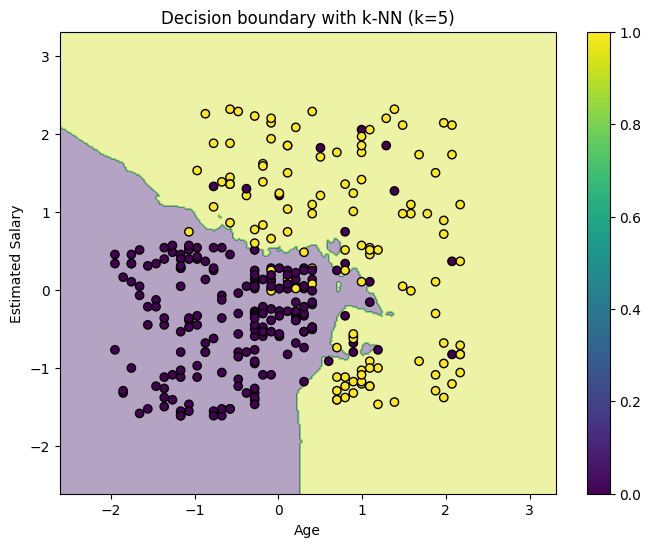

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Charger les données
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle k-NN
k = 5  # nombre de voisins à considérer
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_scaled[:, -1].min() - 1, X_train_scaled[:, -1].max() + 1
y_min, y_max = X_train_scaled[:, -1].min() - 1, X_train_scaled[:, -1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predictions
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision boundary with k-NN (k=5)')
plt.colorbar()
plt.show()
